In [4]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [6]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "tomato",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 16011 files belonging to 10 classes.


In [7]:
class_name=dataset.class_names

In [8]:
class_name

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [9]:
len(dataset)

501

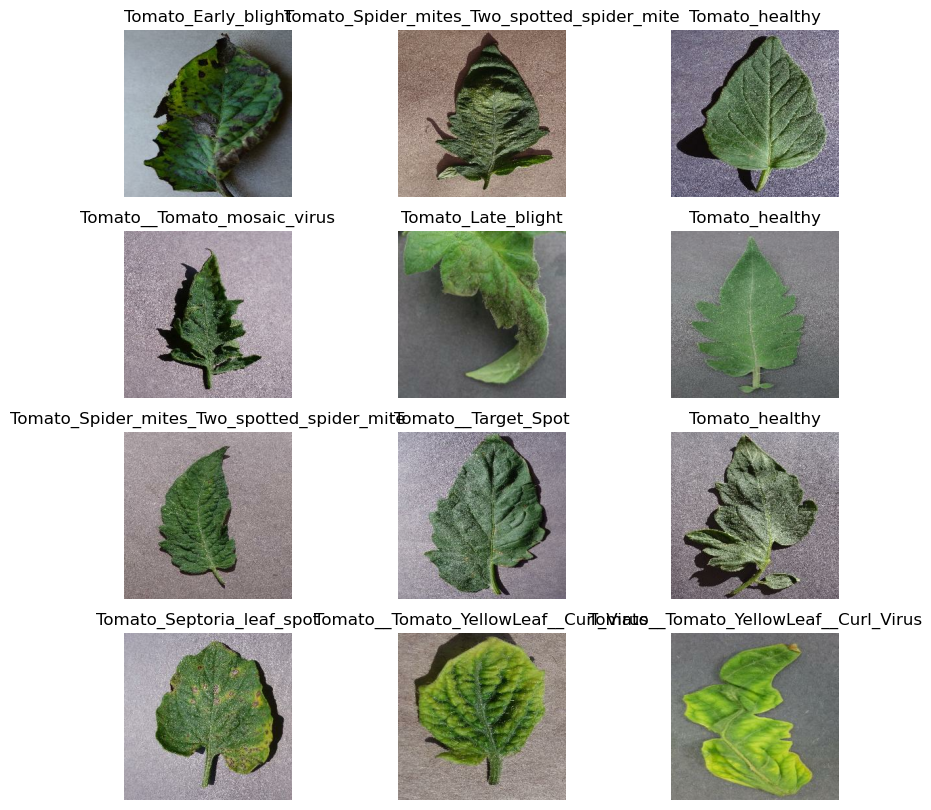

In [10]:
plt.figure(figsize=(10,10))
for image,labels in dataset.take(1):
    for i in range(12):
        plt.subplot(4,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_name[labels[i]])
    

In [11]:
def train_test_split(ds,train_split=0.8,test_split=0.1,validate_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if(shuffle):
        ds.shuffle(shuffle_size,seed=12)
    train_size=int((ds_size)*train_split)
    validate_size=int((ds_size)*validate_split)
    
    train_ds=ds.take(train_size);
    val_ds=ds.skip(train_size).take(validate_size)
    test_ds=ds.skip(train_size).skip(validate_size)
    
    
    return train_ds,test_ds,val_ds

In [12]:
train,test,val=train_test_split(dataset)

In [13]:
len(train)

400

In [14]:
train=train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test=test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val=val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
resize_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [16]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [17]:
AUTOTUNE = tf.data.AUTOTUNE

def preprocess_data(image, label):
    image = resize_rescale(image)  # Apply resizing and rescaling
    image = data_augmentation(image)  # Apply data augmentation
    return image, label

train = train.map(preprocess_data, num_parallel_calls=AUTOTUNE)
test = test.map(preprocess_data, num_parallel_calls=AUTOTUNE)
val = val.map(preprocess_data, num_parallel_calls=AUTOTUNE)

In [18]:


input_shape = (256, 256, 3)  # No batch dimension

model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),  # First Conv layer
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display the summary
model.summary()


C:\Users\Karti\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 184,202 (719.54 KB)

 Trainable params: 184,202 (719.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(
    train,
    batch_size=BATCH_SIZE,
    validation_data=val,
    verbose=1,
    epochs=10,
)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 761s 2s/step - accuracy: 0.3021 - loss: 1.9104 - val_accuracy: 0.4975 - val_loss: 1.3853
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 694s 2s/step - accuracy: 0.5501 - loss: 1.2867 - val_accuracy: 0.6675 - val_loss: 0.8909
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 657s 2s/step - accuracy: 0.6712 - loss: 0.8965 - val_accuracy: 0.7375 - val_loss: 0.6810
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.7595 - loss: 0.6710 - val_accuracy: 0.8175 - val_loss: 0.4934
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 732s 2s/step - accuracy: 0.8085 - loss: 0.5421 - val_accuracy: 0.8506 - val_loss: 0.4116
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 621s 2s/step - accuracy: 0.8388 - loss: 0.4442 - val_accuracy: 0.8462 - val_loss: 0.4122
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 633s 2s/step - accuracy: 0.8584 - loss: 0.3914 - val_accuracy: 0.8863 - val_loss: 0.3103
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 706s 2s/step - accuracy: 0.8716 - loss: 0.3567 - val_accu

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [20]:
scores = model.evaluate(test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 35s 408ms/step - accuracy: 0.8897 - loss: 0.3243


In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

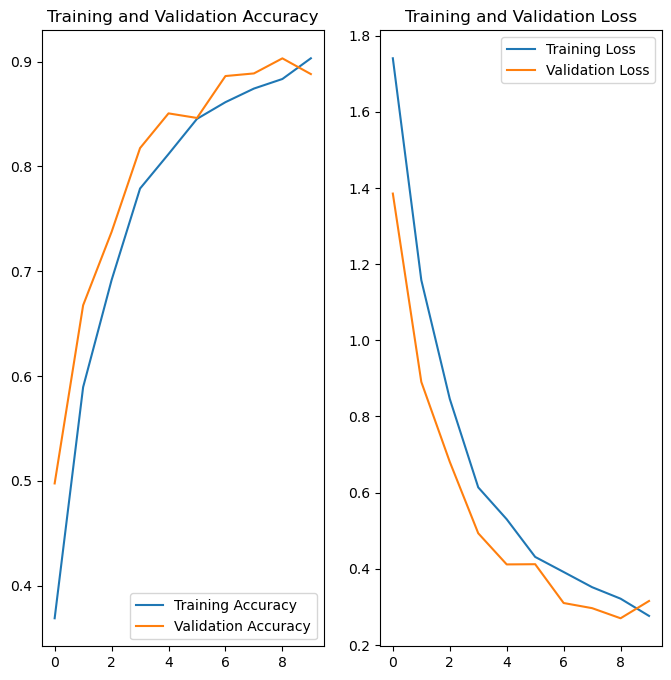

In [22]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
import numpy as np
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


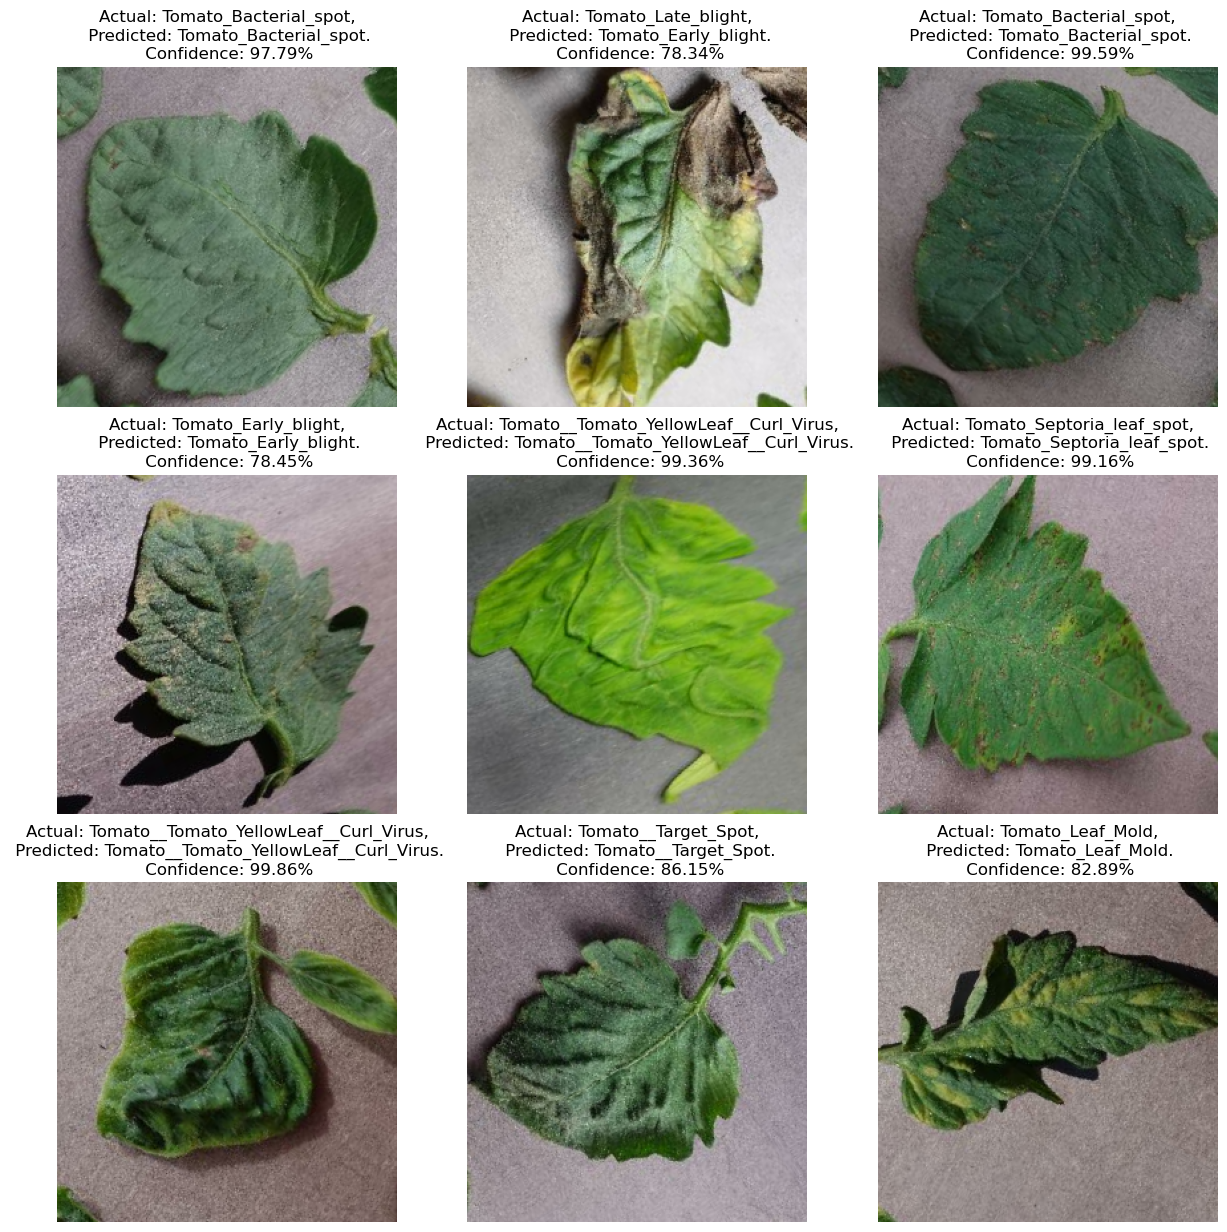

In [24]:
plt.figure(figsize=(15, 15))
for images, labels in test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        
        # Scale pixels for visualization
        image_to_plot = (images[i].numpy() * 255).astype("uint8") if images[i].numpy().max() <= 1 else images[i].numpy().astype("uint8")
        
        plt.imshow(image_to_plot)
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [25]:
model.save("./models/tomato.keras")